In [ ]:
import requests
import pandas as pd

# URL de la API
url = "https://api.covidtracking.com/v1/states/daily.json"

# Realizar la solicitud GET a la API
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
    # Convertir los datos a un DataFrame de pandas
    df = pd.DataFrame(data)
    print(df.head())
else:
    print(f"Error en la solicitud: {response.status_code}")


       date state  positive  probableCases   negative  pending  \
0  20210307    AK   56886.0            NaN        NaN      NaN   
1  20210307    AL  499819.0       107742.0  1931711.0      NaN   
2  20210307    AR  324818.0        69092.0  2480716.0      NaN   
3  20210307    AS       0.0            NaN     2140.0      NaN   
4  20210307    AZ  826454.0        56519.0  3073010.0      NaN   

  totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0        totalTestsViral         1731628.0                   33.0   
1  totalTestsPeopleViral         2323788.0                  494.0   
2        totalTestsViral         2736442.0                  335.0   
3        totalTestsViral            2140.0                    NaN   
4        totalTestsViral         7908105.0                  963.0   

   hospitalizedCumulative  ...  dataQualityGrade  deathIncrease  \
0                  1293.0  ...              None              0   
1                 45976.0  ...              None      

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   float64
 13  onVentilatorCumu

In [ ]:
print(df.describe())

               date      positive  probableCases      negative       pending  \
count  2.078000e+04  2.059200e+04    9271.000000  1.329000e+04   2138.000000   
mean   2.020244e+07  1.651560e+05   21729.123719  8.482246e+05   1659.862956   
std    3.608732e+03  3.267852e+05   45471.459778  1.344501e+06   4671.028548   
min    2.020011e+07  0.000000e+00       0.000000  0.000000e+00      0.000000   
25%    2.020060e+07  5.753750e+03     773.500000  5.394125e+04     43.000000   
50%    2.020090e+07  4.606450e+04    4491.000000  3.059720e+05    212.500000   
75%    2.020120e+07  1.779580e+05   19553.000000  1.056611e+06   1295.750000   
max    2.021031e+07  3.501394e+06  365961.000000  1.018694e+07  64400.000000   

       totalTestResults  hospitalizedCurrently  hospitalizedCumulative  \
count      2.061400e+04           17339.000000            12382.000000   
mean       2.186936e+06            1190.576965             9262.762478   
std        4.436508e+06            2060.041207           

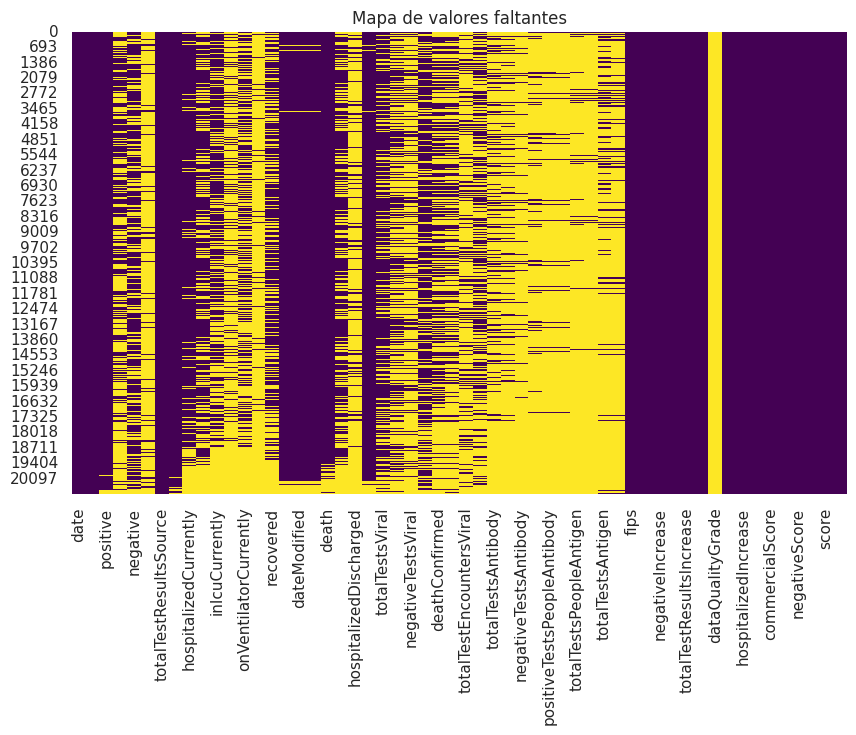

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores faltantes")
plt.show()

## Manejo de valores faltantes

In [ ]:
df.fillna(0, inplace=True)  # Ejemplo: reemplazar NaN con 0

## Convertir fechas a valores datatime

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Visualización de la evolución temporal del CoVid 19

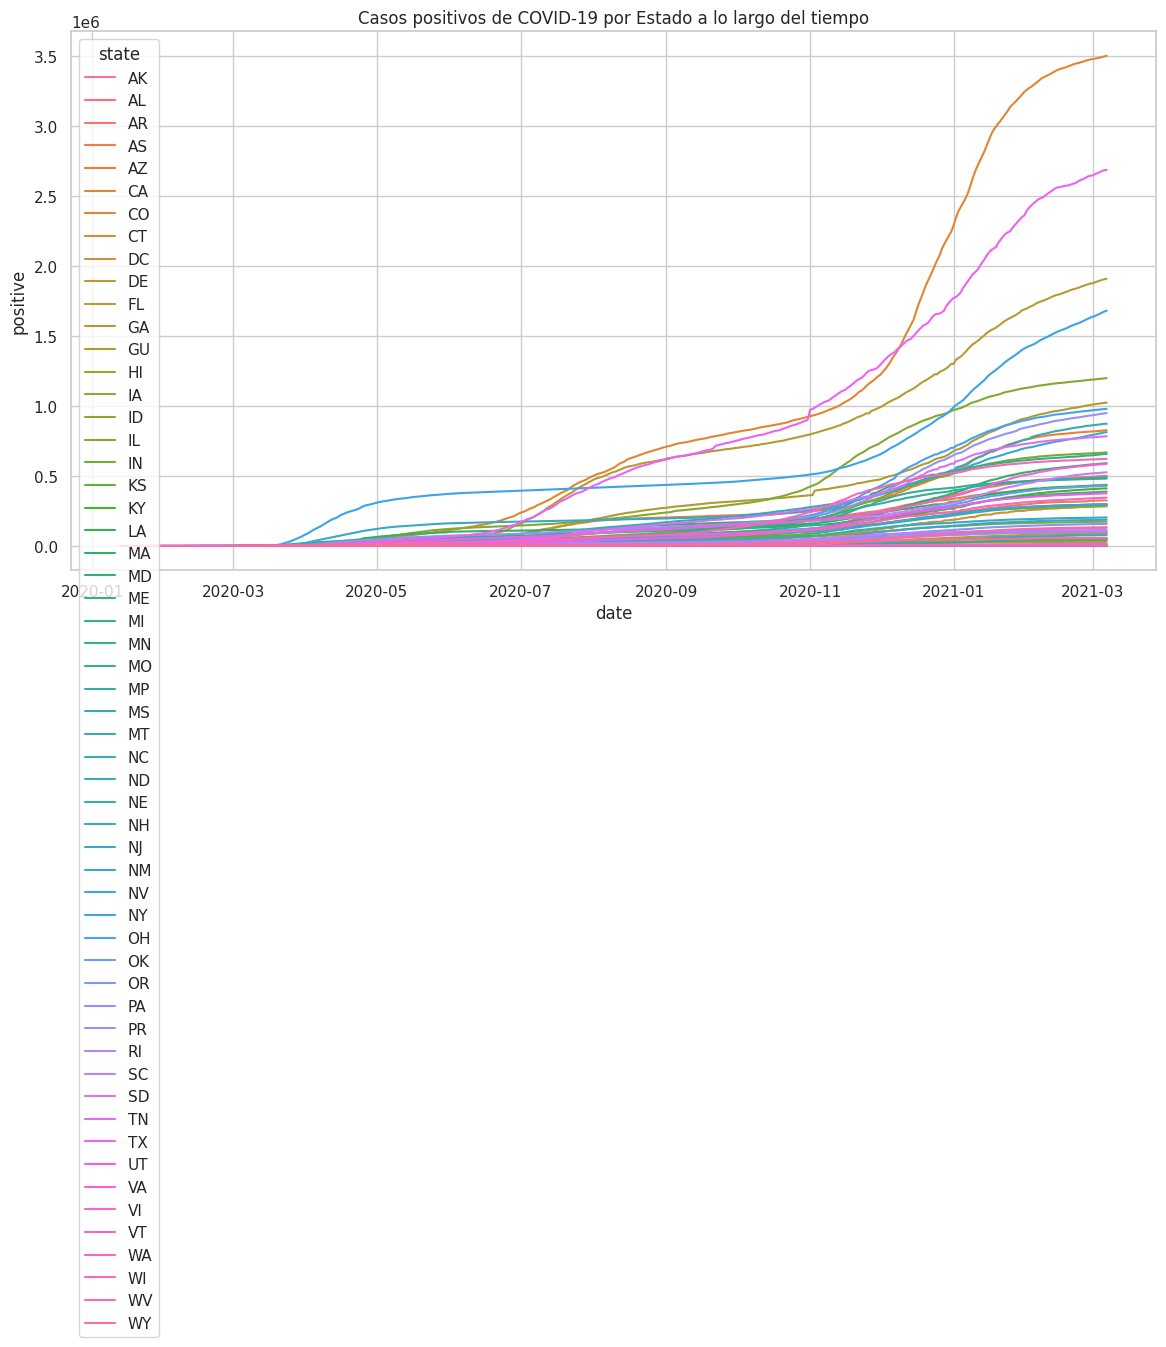

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='positive', data=df, hue='state')
plt.title('Casos positivos de COVID-19 por Estado a lo largo del tiempo')
plt.show()

# Distribución de casos por estado

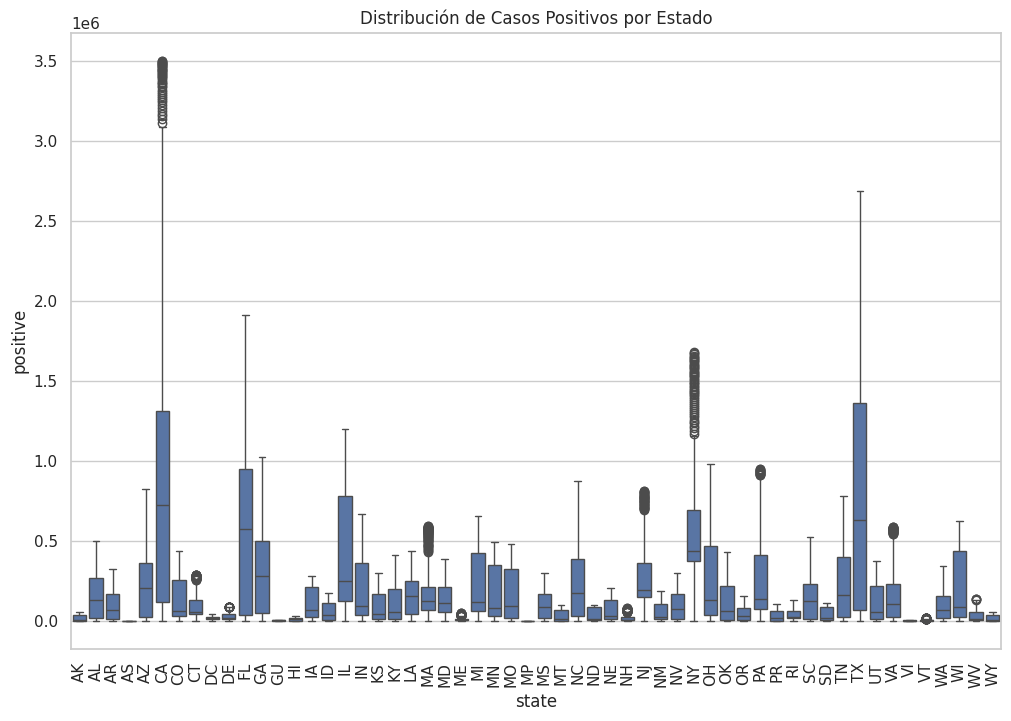

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='positive', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de Casos Positivos por Estado')
plt.show()

# Correlación entre diferentes variables

En la matriz de correlación presentada, las correlaciones entre las variables son las siguientes:

Correlación entre positive y hospitalizedCumulative: 0.41
Correlación entre negative y hospitalizedCumulative: 0.69
Esto indica que la correlación entre el número de casos negativos y el número de hospitalizaciones acumuladas es mayor que la correlación entre el número de casos positivos y el número de hospitalizaciones acumuladas. Sin embargo, esto no implica necesariamente que la tasa de hospitalización sea más alta para los negativos. La correlación alta entre negative y hospitalizedCumulative puede estar influida por otros factores, como la cantidad total de pruebas realizadas o cómo se registran los datos.

Columnas en df: Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized',
       'hospitalizedDischarged', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestRe

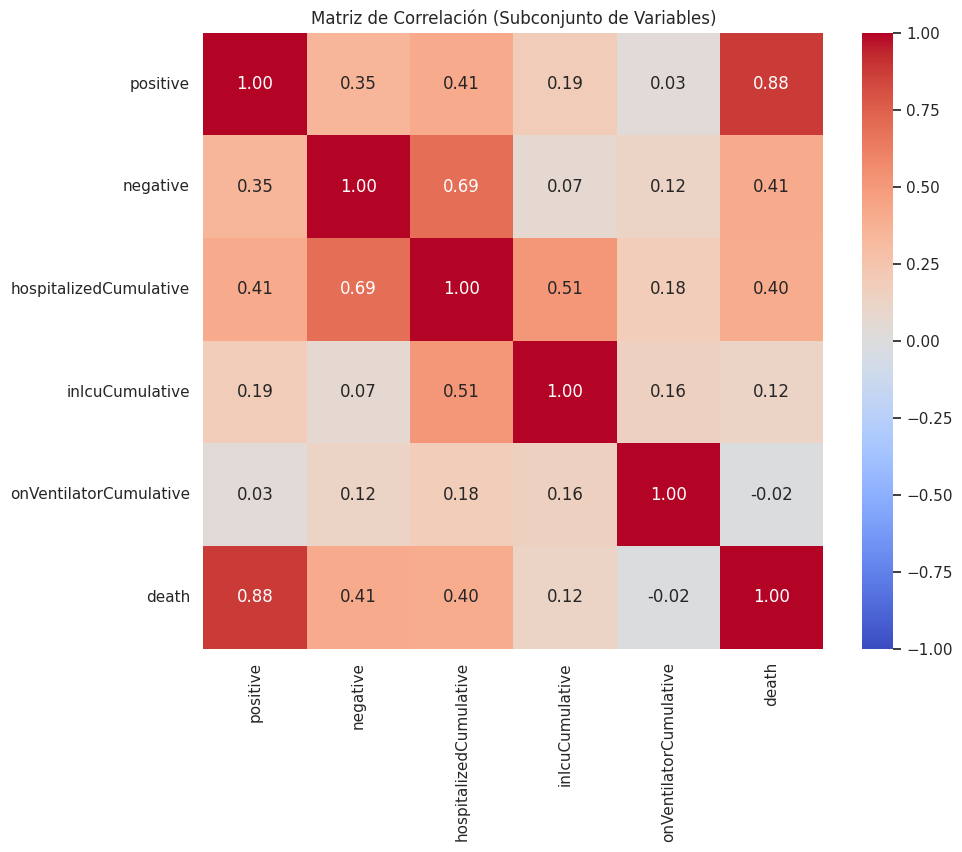

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que df ya está cargado y contiene las columnas necesarias
variables_interes = ['positive', 'negative', 'hospitalizedCumulative',
                     'inIcuCumulative', 'onVentilatorCumulative', 'death']

# Verifica las columnas presentes en df
print("Columnas en df:", df.columns)

# Verifica que todas las columnas necesarias están presentes
missing_columns = [col for col in variables_interes if col not in df.columns]
if missing_columns:
    raise ValueError(f"Faltan las siguientes columnas en el DataFrame: {missing_columns}")

# Filtrar el DataFrame para solo incluir estas columnas
sub_df = df[variables_interes]

# Convertir las columnas a datos numéricos y manejar valores faltantes
sub_df = sub_df.apply(pd.to_numeric, errors='coerce')  # Convierte no numéricos a NaN
sub_df = sub_df.fillna(0)  # Reemplaza NaN con 0, o usa otro método según sea necesario

# Calcular la matriz de correlación
correlation_matrix = sub_df.corr()

# Configurar la figura para que sea más grande
plt.figure(figsize=(10, 8))

# Aplicar un filtro para mostrar solo correlaciones significativas
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt='.2f')

plt.title('Matriz de Correlación (Subconjunto de Variables)')
plt.show()


In [ ]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CustomJS
from bokeh.layouts import column
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256

# Configurar para mostrar en el cuaderno
output_notebook()

# Supongamos que df ya está cargado y preprocesado
# Verificar las columnas del DataFrame
print("Columnas en el DataFrame:", df.columns)

# Verificar las primeras filas del DataFrame
print(df.head())

# Asegúrate de que las columnas de interés existen
if 'positive' not in df.columns or 'negative' not in df.columns:
    raise KeyError("Las columnas 'positive' o 'negative' no se encuentran en el DataFrame.")

# Filtrar el DataFrame para las columnas de interés
df_subset = df[['positive', 'negative', 'date']].copy()

# Crear una fuente de datos para Bokeh
source = ColumnDataSource(df_subset)

# Crear el gráfico de dispersión
p = figure(title="Relación entre Casos Positivos y Negativos de COVID-19",
           x_axis_label='Casos Positivos', y_axis_label='Casos Negativos',
           width=800, height=600, tools="pan,wheel_zoom,box_zoom,reset,hover")

# Agregar el gráfico de dispersión
p.scatter(x='positive', y='negative', source=source, size=8, color='blue', alpha=0.6)

# Añadir herramienta de hover
hover = HoverTool()
hover.tooltips = [("Fecha", "@date{%F}"), ("Casos Positivos", "@positive"), ("Casos Negativos", "@negative")]
hover.formatters = {'@date': 'datetime'}
p.add_tools(hover)

# Añadir un color map para mejorar la visualización si se desea (opcional)
mapper = linear_cmap(field_name='positive', palette=Viridis256, low=df['positive'].min(), high=df['positive'].max())
p.scatter(x='positive', y='negative', source=source, size=8, color=mapper, alpha=0.6)

# Configurar el gráfico
p.xaxis.axis_label = 'Casos Positivos'
p.yaxis.axis_label = 'Casos Negativos'

# Mostrar el gráfico
show(p)

Columnas en el DataFrame: Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized',
       'hospitalizedDischarged', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 't